In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import numpy as np


In [2]:
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')
order_products = pd.read_csv('order_products_s.csv')
orders = pd.read_csv('orders_s.csv')
products = pd.read_csv('products.csv')
tips = pd.read_csv('tips.csv')



In [3]:
tips.drop(columns="Unnamed: 0",inplace=True)

In [4]:
orders

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,1,2,8,NaN
1,2398795,1,2,3,7,15.0
2,473747,1,3,3,12,21.0
3,2254736,1,4,4,7,29.0
4,431534,1,5,4,15,28.0
...,...,...,...,...,...,...
1673016,2266710,206209,10,5,18,29.0
1673017,1854736,206209,11,4,10,30.0
1673018,626363,206209,12,1,12,18.0
1673019,2977660,206209,13,1,12,7.0


In [5]:
# Verknüpfe Tipps mit Bestellungen
orders = orders.merge(tips, on='order_id', how='left')
#orders.dropna(inplace=True)  

In [6]:
orders

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,tip
0,2539329,1,1,2,8,NaN,False
1,2398795,1,2,3,7,15.0,False
2,473747,1,3,3,12,21.0,False
3,2254736,1,4,4,7,29.0,False
4,431534,1,5,4,15,28.0,False
...,...,...,...,...,...,...,...
1673016,2266710,206209,10,5,18,29.0,False
1673017,1854736,206209,11,4,10,30.0,False
1673018,626363,206209,12,1,12,18.0,False
1673019,2977660,206209,13,1,12,7.0,False


In [7]:
orders= orders.sort_values(by=["user_id","order_number"])

# Spalte für vorherige und vor-vorherige Trinkgeldangaben
orders['tip_prev'] = orders.groupby('user_id')['tip'].shift(1)
orders['tip_prev2'] = orders.groupby('user_id')['tip'].shift(2)


In [8]:
orders[orders["user_id"] == 67]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,tip,tip_prev,tip_prev2
550,3205960,67,1,3,11,NaN,True,NaN,NaN
551,970922,67,2,1,15,5.0,True,True,NaN
552,596585,67,3,1,13,7.0,False,True,True
553,2037087,67,4,2,9,8.0,True,False,True
554,2474111,67,5,3,14,8.0,True,True,False
555,1568481,67,6,3,12,7.0,False,True,True
556,1723781,67,7,2,13,6.0,True,False,True
557,2048527,67,8,2,11,7.0,False,True,False
558,2389031,67,9,2,14,7.0,False,False,True
559,2378562,67,10,1,10,6.0,True,False,False


In [9]:
pd.crosstab(orders['tip_prev'], orders['tip'], margins=True,normalize='all')

tip,False,True,All
tip_prev,,,
False,0.432685,0.124802,0.557487
True,0.126103,0.316409,0.442513
All,0.558789,0.441211,1.000000


Ca. 44% aller Bestellungen erhalten Trinkgeld

In [10]:
pd.crosstab(orders['tip'], orders['tip_prev'], margins=True,normalize='index')

tip_prev,False,True
tip,,
False,0.774327,0.225673
True,0.282863,0.717137
All,0.557487,0.442513


Wenn ein Kunde bei der vorhergenden Bestellung Trinkgeld gibt, ist die Wahrscheinlichkeit bei der aktuellen Bestellung 71%, d.h. ein Zusammenhang besteht.

In [11]:
pd.crosstab(orders['tip'], orders['tip_prev2'], margins=True,normalize='index')

tip_prev2,False,True
tip,,
False,0.739978,0.260022
True,0.316907,0.683093
All,0.550662,0.449338


Ähnliche Zahlen, für die vor-vorgehende Bestellung. Besteht diese Zusammenhang durch tip_prev?

In [12]:
pd.crosstab(orders['tip_prev2'], orders['tip_prev'], margins=True,normalize='index')

tip_prev,False,True
tip_prev2,,
False,0.770967,0.229033
True,0.283463,0.716537
All,0.551913,0.448087


In [13]:
orders.pivot_table('tip', 'tip_prev', 'tip_prev2', aggfunc=np.mean)

C:\Users\Benjamin\AppData\Local\Temp\ipykernel_2228\485001432.py:1: FutureWarning: The provided callable <function mean at 0x00000175AF850F40> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  orders.pivot_table('tip', 'tip_prev', 'tip_prev2', aggfunc=np.mean)


tip_prev2,False,True
tip_prev,,
False,0.174175,0.405815
True,0.538099,0.788844


Die Höchste Trinkgeldwahrscheinlichkeit für den Fall tip_prev=True und tip_prev2, D.h. tip_prev2 bietet uns unabhängig von trip_prev informationen über das Trinkgeldverhalten.

C:\Users\Benjamin\AppData\Local\Temp\ipykernel_2228\1942603743.py:4: FutureWarning: The provided callable <function mean at 0x00000175AF850F40> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot = orders.pivot_table('tip', 'tip_prev', 'tip_prev2', aggfunc=np.mean)


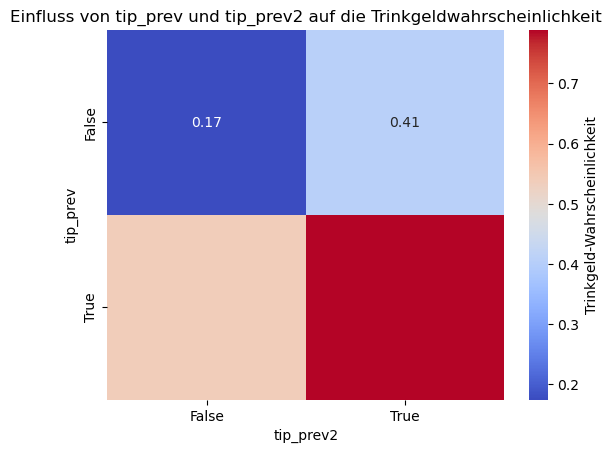

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot = orders.pivot_table('tip', 'tip_prev', 'tip_prev2', aggfunc=np.mean)
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Trinkgeld-Wahrscheinlichkeit'})
plt.title('Einfluss von tip_prev und tip_prev2 auf die Trinkgeldwahrscheinlichkeit')
plt.xlabel('tip_prev2')
plt.ylabel('tip_prev')
plt.show()


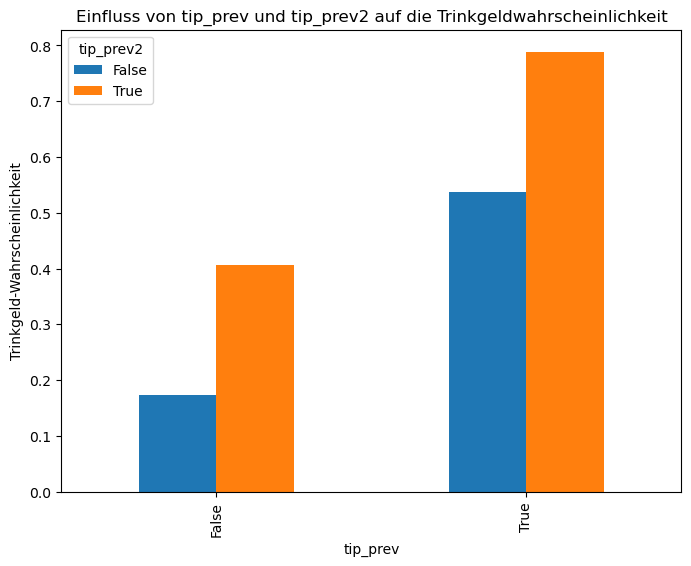

In [15]:
grouped = orders.groupby(['tip_prev', 'tip_prev2'])['tip'].mean().unstack()
grouped.plot(kind='bar', stacked=False, figsize=(8, 6), color=['#1f77b4', '#ff7f0e'])
plt.title('Einfluss von tip_prev und tip_prev2 auf die Trinkgeldwahrscheinlichkeit')
plt.ylabel('Trinkgeld-Wahrscheinlichkeit')
plt.xlabel('tip_prev')
plt.legend(title='tip_prev2')
plt.show()


In [16]:
grouped = orders.groupby(['tip_prev', 'tip_prev2'])['tip'].mean().unstack()

In [27]:
grouped

tip_prev2,False,True
tip_prev,,
False,0.174175,0.405815
True,0.538099,0.788844


Frage 2

Gibt es einen Zusammenhang zwischen dem Trinkgeldverhalten und den Departments, aus
denen bestellt wird?

In [17]:
orders = pd.read_csv('orders_s.csv')

In [18]:
order_products

,order_id,product_id,add_to_cart_order
0,2,33120,1
1,2,28985,2
2,2,9327,3
3,2,45918,4
4,2,30035,5
...,...,...,...
16942231,3421058,6244,4
16942232,3421058,6858,5
16942233,3421058,30316,6
16942234,3421058,35578,7


In [19]:
merged_data = (order_products
               .merge(products, on='product_id')
               .merge(departments, on='department_id')
               .merge(orders, on='order_id')
               .merge(tips, on='order_id'))

In [20]:
merged_data

,order_id,product_id,add_to_cart_order,product_name,aisle_id,department_id,department,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,tip
0,2,33120,1,Organic Egg Whites,86,16,dairy eggs,202279,3,5,9,8.0,False
1,2,28985,2,Michigan Organic Kale,83,4,produce,202279,3,5,9,8.0,False
2,2,9327,3,Garlic Powder,104,13,pantry,202279,3,5,9,8.0,False
3,2,45918,4,Coconut Butter,19,13,pantry,202279,3,5,9,8.0,False
4,2,30035,5,Natural Sweetener,17,13,pantry,202279,3,5,9,8.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942231,3421058,6244,4,Club Soda Lower Sodium,77,7,beverages,136952,20,3,18,15.0,True
16942232,3421058,6858,5,Classic Britannia Crisps,78,19,snacks,136952,20,3,18,15.0,True
16942233,3421058,30316,6,Baby Brie,21,16,dairy eggs,136952,20,3,18,15.0,True
16942234,3421058,35578,7,Genoa Salame with White Cheddar Cheese & Toast...,7,12,meat seafood,136952,20,3,18,15.0,True


C:\Users\Benjamin\AppData\Local\Temp\ipykernel_2228\3211266399.py:2: FutureWarning: The provided callable <function mean at 0x00000175AF850F40> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  tip_rates = merged_data.pivot_table('tip', 'department', aggfunc=np.mean)


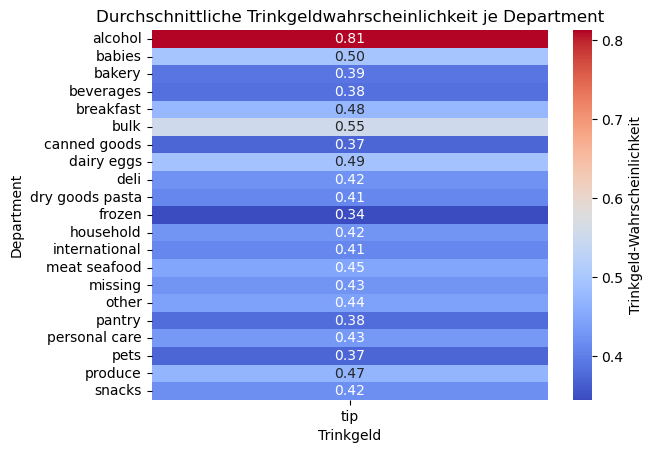

In [21]:
# Pivot-Tabelle für die Trinkgeldwahrscheinlichkeit je Department
tip_rates = merged_data.pivot_table('tip', 'department', aggfunc=np.mean)

# Heatmap
sns.heatmap(tip_rates, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Trinkgeld-Wahrscheinlichkeit'})
plt.title('Durchschnittliche Trinkgeldwahrscheinlichkeit je Department')
plt.ylabel('Department')
plt.xlabel('Trinkgeld')
plt.show()


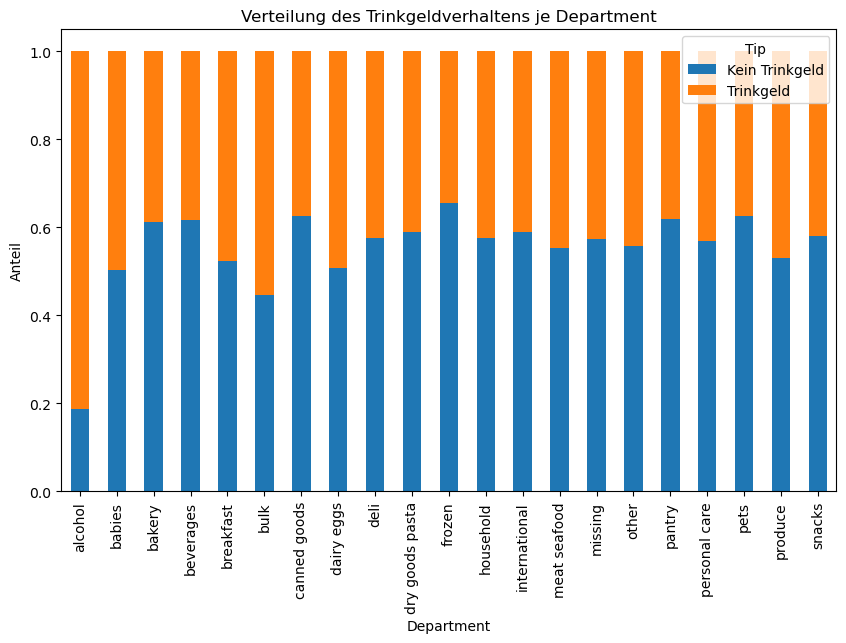

In [22]:
# Gruppiere die Daten nach Department und tip
department_tip = merged_data.groupby(['department', 'tip']).size().unstack()

# Normiere die Daten, um Wahrscheinlichkeiten zu erhalten
department_tip = department_tip.div(department_tip.sum(axis=1), axis=0)

# Balkendiagramm
department_tip.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])
plt.title('Verteilung des Trinkgeldverhaltens je Department')
plt.ylabel('Anteil')
plt.xlabel('Department')
plt.legend(['Kein Trinkgeld', 'Trinkgeld'], title='Tip')
plt.show()


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# One-Hot-Encoding für department
encoder = OneHotEncoder()
X = encoder.fit_transform(merged_data[['department']]).toarray()
y = merged_data['tip']

# Logistische Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression()
#model.fit(X_train, y_train)

#print(f"Modellgenauigkeit: {model.score(X_test, y_test)}")


In [24]:
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


Gibt es einzelne Produkte, die die Trinkgeldwahrscheinlichkeit besonders stark beeinflussen?
(Ermitteln Sie die TOP10 und FLOP10)

In [25]:
# Zähle die Anzahl der Bestellungen pro Produkt
product_counts = merged_data['product_name'].value_counts()

# Behalte nur Produkte, die in mindestens 50 Bestellungen vorkommen
popular_products = product_counts[product_counts >= 4000].index

# Filtere die Orders, um nur diese Produkte zu behalten
filtered_orders = merged_data[merged_data['product_name'].isin(popular_products)]

# Anzahl der verbleibenden Produkte und Bestellungen
remaining_products = filtered_orders['product_name'].nunique()
remaining_orders = len(filtered_orders)

print(f"Verbleibende Produkte: {remaining_products}")
print(f"Verbleibende Bestellungen: {remaining_orders}")


Verbleibende Produkte: 671
Verbleibende Bestellungen: 8022775


In [26]:
product_encoded = pd.get_dummies(filtered_orders['product_name'], prefix='product')

# Kombiniere die encodierten Produkte mit der Zielvariable (tip)
X = product_encoded  # Features: Produkte
y = filtered_orders['tip'].astype(int)  # Zielvariable: Trinkgeld (True/False als 1/0)

# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Logistische Regression
logistic_model = LogisticRegression(max_iter=1000, solver='liblinear')
logistic_model.fit(X_train, y_train)

# Koeffizienten extrahieren
coefficients = pd.DataFrame({
    'product': X.columns,
    'coefficient': logistic_model.coef_[0]
}).sort_values(by='coefficient', ascending=False)

# Top 10 und Flop 10 Produkte
top_10_influential = coefficients.head(10)
flop_10_influential = coefficients.tail(10)

print("Top 10 Produkte mit positivem Einfluss auf Trinkgeld:")
print(top_10_influential)

print("\nFlop 10 Produkte mit negativem Einfluss auf Trinkgeld:")
print(flop_10_influential)

KeyboardInterrupt: 